In [1]:
REPO = '../'
RESULT_TABLE = f'{REPO}/data/table'
RESULT_OBJ = f'{REPO}/data/object'
FIGURE_FOLDER= f'{REPO}/data/figure'
SETTING_FOLDER = f'{REPO}/data/setting'
EXTERNAL_DATA=f'{REPO}/data/external'


import sys
sys.path.append(REPO)
from settings import COLOR_PAlETTE
from utils.visual import *
from utils.statsTest import lmTest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scPipe as sp
import scanpy as sc
import seaborn as sns
import warnings
import commentjson
### Additional Colormap
with open(f'{SETTING_FOLDER}/ColorMap.json','r') as f:
    colormap = commentjson.load(f)
COLOR_PAlETTE.update(colormap)
plt.style.use(f'{REPO}/paper.mplstyle')
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
adata = sc.read(f'{RESULT_OBJ}/gex_all.h5ad')
obs = pd.read_csv(f"{RESULT_TABLE}/MPs/CD8T/Annotation.csv",index_col=0)
sample_meta = pd.read_excel(f'{RESULT_TABLE}/Supplementary Table 1.xlsx',index_col=0).replace(np.nan,'N/A')

adata = adata[adata.obs.index.isin(obs.index),:]
adata.obs['Cellstate'] = obs.loc[adata.obs.index,'Cellstate']
adata.obs = adata.obs.merge(sample_meta,left_on='Sample',right_on='CCG_ID')
print(f'{adata.obs.shape[0]:,} CD8 T cells')
adata.obs['Cellstate'].value_counts()

17,230 CD8 T cells


CD8T.Cytotoxic    9453
CD8T.Naive        5392
CD8T.Exhausted    2385
Name: Cellstate, dtype: int64

In [3]:
cd8T_ra_prop = (
    adata.obs.
    groupby(['Patient','Timepoint','BestResponse'])['Cellstate'].
    value_counts(normalize=True).
    rename('Pct').
    reset_index()
)

## Explore the trend for R

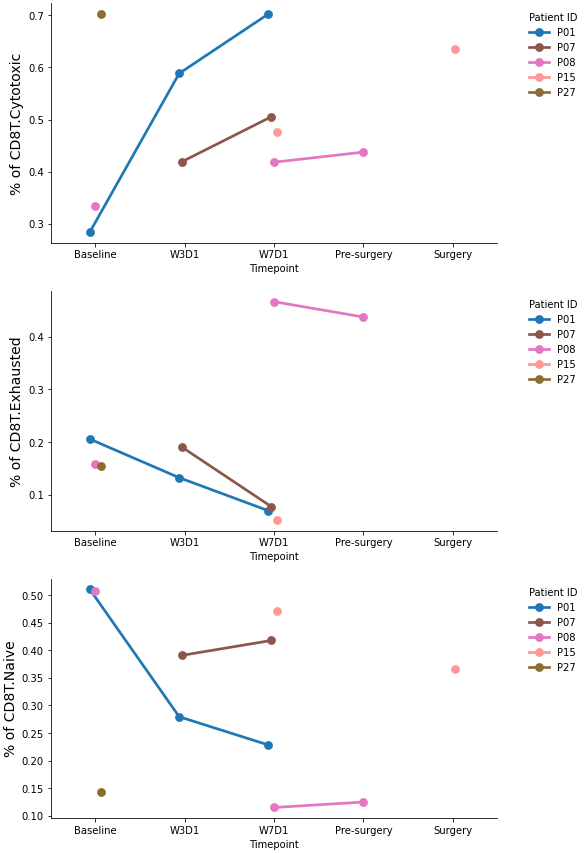

In [17]:
fig,axs = plt.subplots(3,1,figsize=(8, 15))
for i,(cellstate,data) in enumerate(cd8T_ra_prop.groupby('Cellstate')):
    # Create the point plot
    ax=axs[i]
    sns.pointplot(
        data=data.loc[(data.BestResponse=='favorable response\n(RCB 0-I)'),:],
        x='Timepoint',
        y='Pct',
        order=['Baseline','W3D1','W7D1','Pre-surgery','Surgery'],
        hue='Patient',
        palette=COLOR_PAlETTE['Patient'],
        dodge=True,
        ax=ax
    )
    
    # Add labels and title
    # ax.set_title(f'% of {cellstate} in CD8T population changes Over Time by Patient ID', fontsize=16)
    # ax.set_xlabel('Timepoint', fontsize=14)
    ax.set_ylabel(f'% of {cellstate}', fontsize=14)
    ax.legend(title='Patient ID', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.savefig(f'{FIGURE_FOLDER}/CD8T_MP_Distribution_By_Patient_R.pdf',dpi=150,bbox_inches='tight')

## Explore the trend in NR

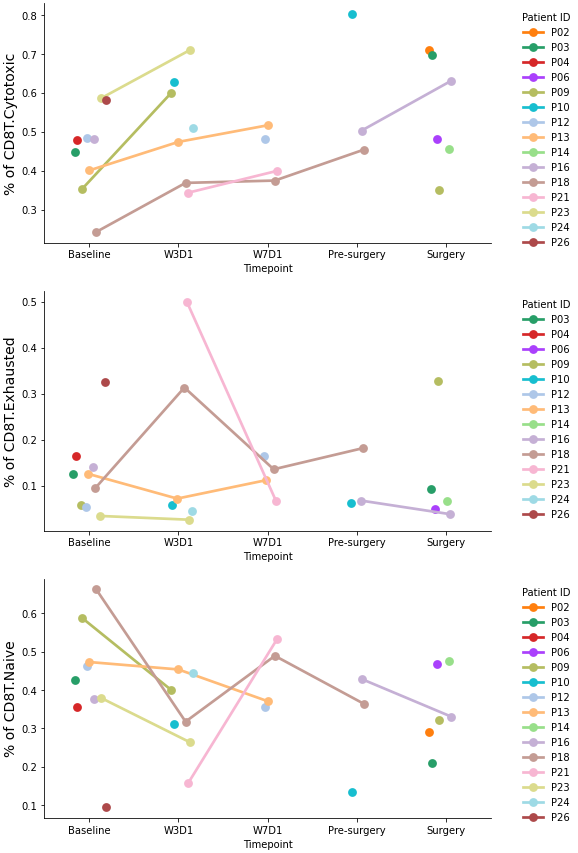

In [18]:
fig,axs = plt.subplots(3,1,figsize=(8, 15))
for i,(cellstate,data) in enumerate(cd8T_ra_prop.groupby('Cellstate')):
    # Create the point plot
    ax=axs[i]
    sns.pointplot(
        data=data.loc[(data.BestResponse=='unfavorable response\n(RCB II-III)'),:],
        x='Timepoint',
        y='Pct',
        order=['Baseline','W3D1','W7D1','Pre-surgery','Surgery'],
        hue='Patient',
         palette=COLOR_PAlETTE['Patient'],
        dodge=True,
        ax=ax
    )
    
    # Add labels and title
    # ax.set_title(f'% of {cellstate} in CD8T population changes Over Time by Patient ID', fontsize=16)
    # ax.set_xlabel('Timepoint', fontsize=14)
    ax.set_ylabel(f'% of {cellstate}', fontsize=14)
    ax.legend(title='Patient ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    
fig.savefig(f'{FIGURE_FOLDER}/CD8T_MP_Distribution_By_Patient_NR.pdf',dpi=150,bbox_inches='tight')